In [2]:
# Imports

import numpy as np
import pandas as pd
import warnings

import itertools
import string

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline

pd.options.display.max_colwidth = 150
seed = 7
np.random.seed(seed)

In [3]:
meta_features_df_train = pd.read_csv("./data/engineered_meta_ftrs.csv")
y_train = meta_features_df_train['target']
meta_features_df_train.drop(columns=['target', 'Unnamed: 0'], inplace=True)

In [4]:
kwargs_histplot = {'kde':True, 'stat':"density", 'linewidth':0, 'bins':20}
color_non = '#2c2fbf'
color_disaster ='#f14848'

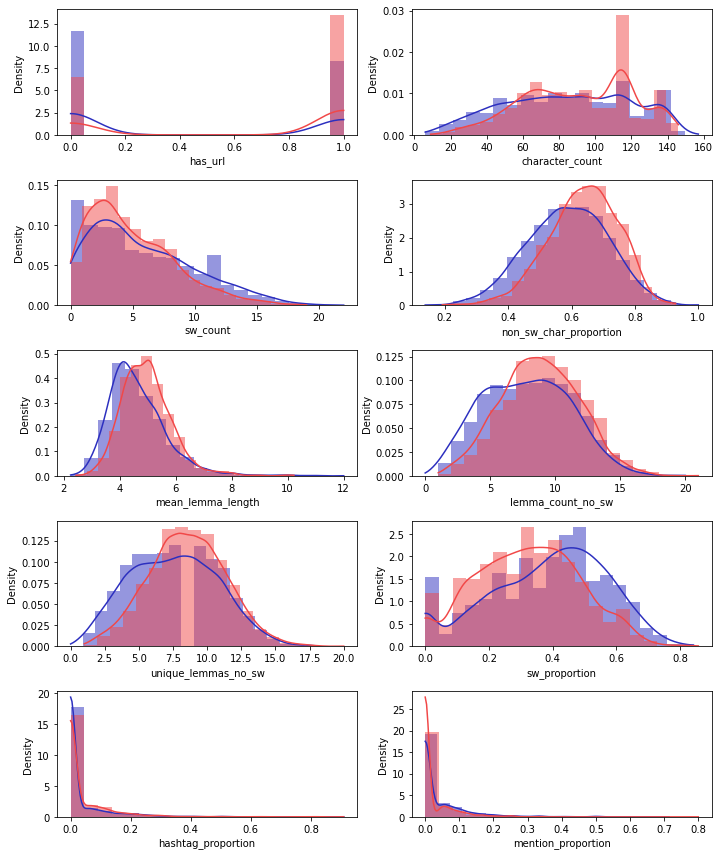

In [5]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,12))
fl_ax = axes.flatten()
fig.set_facecolor('white')
for idx, ftr in list(enumerate(meta_features_df_train.columns)):
    sns.histplot(meta_features_df_train[ftr][y_train==0], ax=fl_ax[idx], **kwargs_histplot, color=color_non)
    sns.histplot(meta_features_df_train[ftr][y_train==1], ax=fl_ax[idx], **kwargs_histplot, color=color_disaster)
plt.tight_layout()
# plt.savefig('./images/meta_features_basic.png', dpi=500)
plt.show()

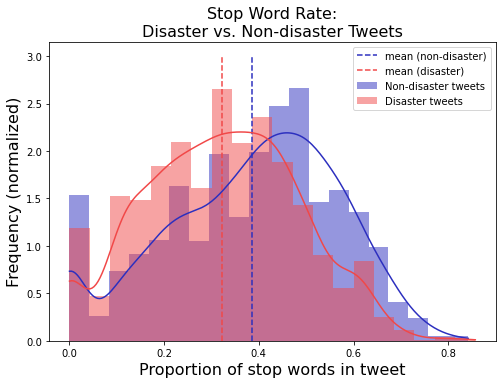

In [8]:
fig, ax = plt.subplots(figsize=(8, 5.5))

sns.histplot(meta_features_df_train['sw_proportion'][y_train==0], ax=ax, **kwargs_histplot, color=color_non, label='Non-disaster tweets')
sns.histplot(meta_features_df_train['sw_proportion'][y_train==1], ax=ax, **kwargs_histplot, color=color_disaster, label='Disaster tweets')
ax.vlines(meta_features_df_train['sw_proportion'][y_train==0].mean(), colors=color_non, linestyles='dashed', ymin=0, ymax=3, label='mean (non-disaster)')
ax.vlines(meta_features_df_train['sw_proportion'][y_train==1].mean(), colors=color_disaster, linestyles='dashed', ymin=0, ymax=3, label='mean (disaster)')

ax.set_xlabel('Proportion of stop words in tweet', size=16)
ax.set_ylabel('Frequency (normalized)', size=16)
ax.set_title('Stop Word Rate:\nDisaster vs. Non-disaster Tweets', size=16)
ax.legend()
# fig.set_facecolor('white')

plt.savefig('./images/transparent/meta_sw_clear.png', dpi=500, transparent=True)

plt.show()

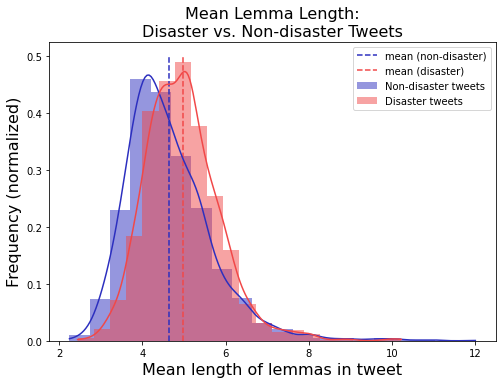

In [10]:
fig, ax = plt.subplots(figsize=(8, 5.5))

sns.histplot(meta_features_df_train['mean_lemma_length'][y_train==0], ax=ax, **kwargs_histplot, color=color_non, label='Non-disaster tweets')
sns.histplot(meta_features_df_train['mean_lemma_length'][y_train==1], ax=ax, **kwargs_histplot, color=color_disaster, label='Disaster tweets')
ax.vlines(meta_features_df_train['mean_lemma_length'][y_train==0].mean(), colors=color_non, linestyles='dashed', ymin=0, ymax=0.5, label='mean (non-disaster)')
ax.vlines(meta_features_df_train['mean_lemma_length'][y_train==1].mean(), colors=color_disaster, linestyles='dashed', ymin=0, ymax=0.5, label='mean (disaster)')

ax.set_xlabel('Mean length of lemmas in tweet', size=16)
ax.set_ylabel('Frequency (normalized)', size=16)
ax.set_title('Mean Lemma Length:\nDisaster vs. Non-disaster Tweets', size=16)
ax.legend()
# fig.set_facecolor('white')

plt.savefig('./images/transparent/meta_lemma_length_clear.png', dpi=500, transparent=True)

plt.show()